In [56]:
import tfcomb
C = tfcomb.CombObj(verbosity=0)

In [57]:
C.TFBS_from_motifs(regions="/home/stud7/notebooks/stud7/Datenanalyse-2021/wp6/testdaten/enhancers/HepG2_enhancers.bed", 
                   motifs="/home/stud7/notebooks/stud7/Datenanalyse-2021/wp6/testdaten/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome="/home/stud7/notebooks/stud7/Datenanalyse-2021/wp6/testdaten/hg19_masked.fa", 
                   threads=8)

#### running count_within() with stranded option turned on

In [58]:
C.count_within(stranded=True, threads=8)
C.market_basket()

### Analyze preferential orientation of motifs

##### First, we create a directionality analysis for the rules found:


In [60]:
df_orientation = C.analyze_orientation()

INFO: Rules are symmetric - scenarios counted are: ['same', 'opposite']


In [62]:
df_orientation.head()

,TF1,TF2,TF1_TF2_count,same,opposite,std,pvalue
KLF1-KLF9,KLF1,KLF9,683,0.898975,0.101025,0.564236,1.406519e-96
KLF12-KLF9,KLF12,KLF9,637,0.912088,0.087912,0.582780,4.216108e-96
KLF9-SP1,KLF9,SP1,792,0.866162,0.133838,0.517831,2.260039e-94
SP1-SP2,SP1,SP2,1700,0.747059,0.252941,0.349394,2.903800e-92
KLF1-KLF3,KLF1,KLF3,860,0.844186,0.155814,0.486753,1.272837e-90


We can subset these on pvalue and number of sites:

In [63]:
orientation_selected = df_orientation[(df_orientation["pvalue"] < 0.01)
              & (df_orientation["TF1_TF2_count"] > 50)]

In [64]:
#Number of TF pairs with significant differences in orientation
orientation_selected.shape[0]

1353

### Visualization of orientation preference

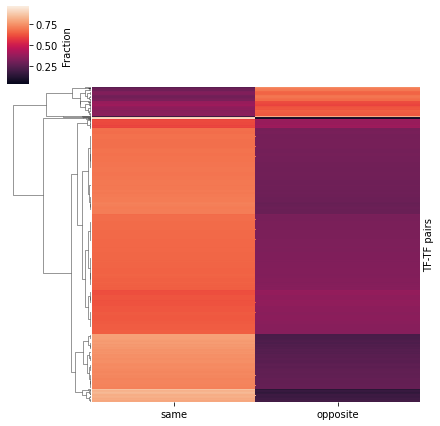

In [68]:
orientation_heatmap=orientation_selected.plot_heatmap()

We can select the subsets by investigating the selected pairs:

In [69]:
#orientation_selected.sort_values("same").tail(5)

,TF1,TF2,TF1_TF2_count,same,opposite,std,pvalue
KLF12-KLF4,KLF12,KLF4,327,0.920489,0.079511,0.594662,3.151907e-52
KLF9-KLF9,KLF9,KLF9,345,0.927536,0.072464,0.604628,8.408487e-57
KLF4-KLF9,KLF4,KLF9,336,0.934524,0.065476,0.614509,3.929475e-57
KLF4-KLF4,KLF4,KLF4,99,0.949495,0.050505,0.635682,3.725006e-19
ZNF331-ZNF331,ZNF331,ZNF331,89,0.955056,0.044944,0.643547,9.006312e-18


In [70]:
#orientation_selected.sort_values("opposite").tail(5)

,TF1,TF2,TF1_TF2_count,same,opposite,std,pvalue
KLF1-ZFX,KLF1,ZFX,121,0.231405,0.768595,0.379851,3.440008e-09
KLF12-ZFX,KLF12,ZFX,89,0.179775,0.820225,0.452866,1.522269e-09
ZIC3-ZNF768,ZIC3,ZNF768,73,0.178082,0.821918,0.455261,3.777848e-08
KLF9-ZFX,KLF9,ZFX,96,0.135417,0.864583,0.515599,9.042597e-13
ZKSCAN1-ZNF768,ZKSCAN1,ZNF768,63,0.031746,0.968254,0.662211,1.059203e-13



### Extended analysis with directional=True

#### The first analysis presented does not take into account the relative order of TF1-TF2, e.g. if the orientation "same" represents "TF1-TF2" or


In [72]:
C.count_within(directional=True, stranded=True, threads=8)
C.market_basket()
#C.to_pickle('/home/stud7/notebooks/stud7/Datenanalyse-2021/wp6/analyse/orientation_extAnalysisObject_hepG2.pkl')

In [74]:
df_orientation = C.analyze_orientation()

INFO: Rules are directional - scenarios counted are: ['TF1-TF2', 'TF2-TF1', 'convergent', 'divergent']


In [75]:
df_orientation.head()

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
SP1-SP1,SP1,SP1,1490,0.442282,0.442282,0.065101,0.050336,0.222110,6.857407e-191
MAZ-MAZ,MAZ,MAZ,2004,0.414172,0.414172,0.097305,0.074351,0.189801,1.795362e-187
SP2-SP2,SP2,SP2,1728,0.414931,0.414931,0.096065,0.074074,0.190657,4.627985e-163
SP3-SP3,SP3,SP3,1463,0.425837,0.425837,0.086808,0.061517,0.203302,5.847423e-157
ZNF467-ZNF467,ZNF467,ZNF467,1541,0.415315,0.415315,0.093446,0.075925,0.191023,6.207794e-146


similarly to the first analysis, we can select the significant pairs and visualize the preferences for orientation:

In [76]:
orientation_selected = df_orientation[(df_orientation["pvalue"] < 0.05)
              & (df_orientation["TF1_TF2_count"] > 50)]             

In [77]:
orientation_selected.shape[0]

1548

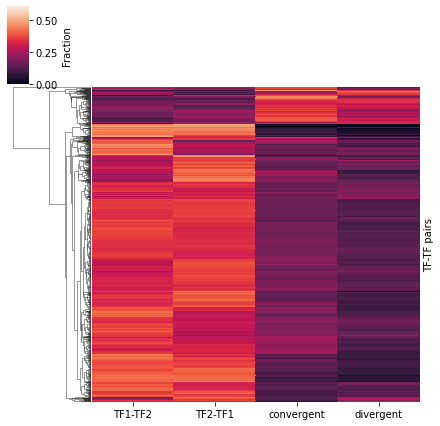

In [78]:
orientation_heatmap = selected.plot_heatmap()


### In-depth look at preferential orientation



By sorting the selected co-occurring TF pairs, it is also possible to visualize the top pairs within each scenario as seen below.


#### TFs specific in TF1-TF2 orientation

In [79]:
orientation_selected.sort_values("TF1-TF2", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
KLF4-ZNF331,KLF4,ZNF331,51,0.509804,0.313725,0.117647,0.058824,0.204634,1.141334e-05
SP4-TBX3,SP4,TBX3,53,0.509434,0.207547,0.113208,0.169811,0.177248,1.712776e-04
VDR-ZNF341,VDR,ZNF341,55,0.509091,0.272727,0.145455,0.072727,0.191485,2.268982e-05
CTCF-KLF9,CTCF,KLF9,52,0.500000,0.173077,0.134615,0.192308,0.168384,5.090224e-04
KLF4-KLF9,KLF4,KLF9,336,0.497024,0.437500,0.035714,0.029762,0.252058,3.033905e-55
SALL4-ZNF554,SALL4,ZNF554,55,0.490909,0.327273,0.072727,0.109091,0.196035,1.296018e-05
OSR2-OSR2,OSR2,OSR2,51,0.490196,0.490196,0.019608,0.000000,0.277470,3.280991e-10
ZNF331-ZNF331,ZNF331,ZNF331,174,0.488506,0.488506,0.011494,0.011494,0.275403,4.124355e-34
KLF4-KLF4,KLF4,KLF4,193,0.487047,0.487047,0.020725,0.005181,0.273791,2.113358e-37
KLF12-TFDP1,KLF12,TFDP1,70,0.485714,0.300000,0.185714,0.028571,0.192548,7.931623e-07


#### TFs specific in TF2-TF1 orientation

In [81]:
orientation_selected.sort_values("TF2-TF1", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
BHLHA15-FLI1,BHLHA15,FLI1,51,0.215686,0.509804,0.196078,0.078431,0.183502,1.269810e-04
OSR2-OSR2,OSR2,OSR2,51,0.490196,0.490196,0.019608,0.000000,0.277470,3.280991e-10
KLF12-KLF4,KLF12,KLF4,327,0.431193,0.489297,0.055046,0.024465,0.244245,1.806183e-50
ZNF331-ZNF331,ZNF331,ZNF331,174,0.488506,0.488506,0.011494,0.011494,0.275403,4.124355e-34
KLF4-KLF4,KLF4,KLF4,193,0.487047,0.487047,0.020725,0.005181,0.273791,2.113358e-37
ZEB1-ZNF341,ZEB1,ZNF341,60,0.266667,0.483333,0.150000,0.100000,0.170511,1.086861e-04
ZEB1-ZEB1,ZEB1,ZEB1,56,0.482143,0.482143,0.017857,0.017857,0.268055,1.851271e-10
KLF9-KLF9,KLF9,KLF9,665,0.481203,0.481203,0.024060,0.013534,0.267005,5.542264e-123
ZKSCAN1-ZKSCAN1,ZKSCAN1,ZKSCAN1,75,0.480000,0.480000,0.013333,0.026667,0.265637,1.046493e-13
KLF9-TFDP1,KLF9,TFDP1,73,0.328767,0.479452,0.123288,0.068493,0.189608,6.692426e-07



#### TFs specific in convergent orientation

In [82]:
orientation_selected.sort_values("convergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
ZKSCAN1-ZNF768,ZKSCAN1,ZNF768,63,0.015873,0.015873,0.603175,0.365079,0.287290,1.807270e-13
ASCL1-RXRA,ASCL1,RXRA,55,0.127273,0.200000,0.490909,0.181818,0.163552,5.182247e-04
KLF12-ZFX,KLF12,ZFX,89,0.067416,0.112360,0.483146,0.337079,0.195125,7.709209e-09
EGR1-SMAD3,EGR1,SMAD3,58,0.137931,0.137931,0.482759,0.241379,0.162655,3.613404e-04
ASCL1-FLI1,ASCL1,FLI1,63,0.142857,0.222222,0.460317,0.174603,0.143955,1.327113e-03
SMAD3-SP2,SMAD3,SP2,109,0.183486,0.119266,0.458716,0.238532,0.147433,2.948649e-06
FOXJ3-IRF3,FOXJ3,IRF3,64,0.171875,0.203125,0.453125,0.171875,0.136216,2.583875e-03
LYL1-ZNF770,LYL1,ZNF770,56,0.107143,0.232143,0.446429,0.214286,0.142111,3.550545e-03
NFATC1-ZFP82,NFATC1,ZFP82,56,0.178571,0.160714,0.446429,0.214286,0.132833,7.888899e-03
AR-IRF3,AR,IRF3,53,0.150943,0.113208,0.433962,0.301887,0.147263,3.201714e-03


#### TFs specific in divergent orientation

In [83]:
orientation_selected.sort_values("divergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
ZFP82-ZNF263,ZFP82,ZNF263,67,0.134328,0.164179,0.253731,0.447761,0.141266,1.110265e-03
KLF9-ZFX,KLF9,ZFX,96,0.041667,0.093750,0.427083,0.437500,0.211606,3.674543e-11
FOXO1-PATZ1,FOXO1,PATZ1,52,0.115385,0.230769,0.230769,0.423077,0.127562,1.730265e-02
WT1-ZFP82,WT1,ZFP82,64,0.218750,0.171875,0.187500,0.421875,0.116229,1.563327e-02
ASCL1-KLF5,ASCL1,KLF5,81,0.185185,0.172840,0.222222,0.419753,0.115098,4.911339e-03
KLF15-ZNF667,KLF15,ZNF667,73,0.205479,0.109589,0.273973,0.410959,0.126728,2.813389e-03
ZIC3-ZNF768,ZIC3,ZNF768,73,0.068493,0.109589,0.410959,0.410959,0.186615,1.079579e-06
EGR1-MYOD1,EGR1,MYOD1,55,0.181818,0.145455,0.272727,0.400000,0.113424,3.688424e-02
THAP11-ZNF143,THAP11,ZNF143,70,0.271429,0.271429,0.057143,0.400000,0.142141,7.163693e-04
PATZ1-ZNF667,PATZ1,ZNF667,80,0.212500,0.137500,0.250000,0.400000,0.110397,8.484779e-03


 #### .loc-operator to show the results of a subset of TF1-TF2-pairs:

In [86]:
df_orientation.loc[["EGR1-MYOD1","SP1-SP1","WT1-ZFP82"]]

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
EGR1-MYOD1,EGR1,MYOD1,55,0.181818,0.145455,0.272727,0.400000,0.113424,3.688424e-02
SP1-SP1,SP1,SP1,1490,0.442282,0.442282,0.065101,0.050336,0.222110,6.857407e-191
WT1-ZFP82,WT1,ZFP82,64,0.218750,0.171875,0.187500,0.421875,0.116229,1.563327e-02


In [89]:
TF_pairs =list(orientation_selected[["TF1","TF2"]].itertuples(index=False, name=None)) 
len(TF_pairs)


1548

In [52]:
#selection=cobj.select_custom_rules(names)
#selection=df.select_custom_rules(names)
#selection=C.select_custom_rules(names)
#selection=selected.select_custom_rules(names)

In [91]:
from tfcomb import CombObj
genome_path="../testdaten/hg19_masked.fa"
motif_path="../testdaten/HOCOMOCOv11_HUMAN_motifs.txt"
result_path="./results/"

In [92]:
hepG2_object = CombObj().from_pickle(f"{result_path}HepG2_enhancers_complete.pkl")

In [94]:
TF_pairs_of_orientation_for_distance=hepG2_object.select_custom_rules(TF_pairs)

In [95]:
TF_pairs_of_orientation_for_distance.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
0,SP1,SP1,6241,13996,13996,0.445913,78.738420
1,MAZ,MAZ,7745,20220,20220,0.383037,35.603196
2,SP2,SP2,7626,15377,15377,0.495935,80.090104
3,SP3,SP3,6422,15180,15180,0.423057,77.306654
4,ZNF467,ZNF467,6610,19148,19148,0.345206,32.733659
...,...,...,...,...,...,...,...
1543,OSR2,SP3,2129,4364,15180,0.261576,12.814186
1544,INSM1,ZNF263,1944,4171,13869,0.255596,14.742517
1545,MAZ,TFAP2B,4012,20220,5130,0.393923,29.631334
1546,SP3,TCF4,2532,15180,5441,0.278605,12.545213


In [96]:
TF_pairs_of_orientation_for_distance.analyze_distances(threads=6)

INFO: DistObject successfully created! It can be accessed via combobj.distObj
INFO: Calculating distances
INFO: Normalizing data.
INFO: Done finding distances! Results are found in .distances
INFO: Run .linregress_all() to fit linear regression
INFO: Fitting linear regression. With number of threads: 6
INFO: Linear regression finished! Results can be found in .linres
INFO: Correcting background with 6 threads.
INFO: Background correction finished! Results can be found in .corrected
INFO: Smoothing signals with window size 3
INFO: Shifting signals above zero
INFO: Analyzing Signal with threads 6
INFO: Done analyzing signal. Results are found in .peaks


In [97]:
TF_pairs_of_orientation_for_distance.distObj.evaluate_noise(threads=6)

INFO: Evaluating noisiness of the signals with 6 threads


In [123]:
TF_pairs_of_orientation_for_distance.distObj.rank_rules()

In [129]:
TF_pairs_of_orientation_for_distance.distObj.peaks.head(10)

,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank
2282,ZKSCAN1,ZKSCAN1,25,4.046677,5.116921,2,102,0.166667,0.088382,1.0,12.0,2.0,5.000000
1415,MYF6,TGIF1,48,4.802395,6.124940,2,80,0.137500,0.133347,3.0,2.0,14.0,6.333333
2287,ZNF143,ZNF143,42,4.197712,5.336630,2,194,0.103093,0.129213,6.0,7.0,10.0,7.666667
2159,THAP11,ZNF143,42,3.924486,5.221198,2,338,0.097633,0.131901,10.0,24.0,13.0,15.666667
2341,ZNF331,ZNF331,20,3.740576,4.740100,2,515,0.099029,0.097295,9.0,37.0,3.0,16.333333
74,CTCFL,CTCFL,11,3.606908,4.926635,2,563,0.085258,0.124483,14.0,51.0,8.0,24.333333
2161,THAP11,ZNF76,40,3.806288,5.225403,2,471,0.067941,0.115631,40.0,30.0,4.0,24.666667
544,ETS2,ETS2,3,3.928936,4.453747,2,1195,0.074477,0.154193,23.0,23.0,41.0,29.000000
1709,PRDM6,PRDM6,2,3.883841,3.883841,2,1572,0.068702,0.159878,37.0,25.0,60.0,40.666667
852,KLF1,RXRA,6,3.934371,3.997307,2,3249,0.059711,0.123129,101.0,22.0,6.0,43.000000


In [112]:
df_orientation_distance=TF_pairs_of_orientation_for_distance.distObj.peaks.merge(orientation_selected, left_on =["TF1","TF2"], right_on = ["TF1","TF2"])

In [228]:
df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].head(50)
#df_orientation_distance


,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count_x,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank,TF1_TF2_count_y,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
0,ZKSCAN1,ZKSCAN1,25,4.046677,5.116921,2,102,0.166667,0.088382,1.0,12.0,2.0,5.000000,75,0.480000,0.480000,0.013333,0.026667,0.265637,1.046493e-13
1,ZKSCAN1,ZKSCAN1,66,2.989215,3.767583,2,102,0.117647,0.088382,4.0,275.0,2.0,93.666667,75,0.480000,0.480000,0.013333,0.026667,0.265637,1.046493e-13
2,MYF6,TGIF1,48,4.802395,6.124940,2,80,0.137500,0.133347,3.0,2.0,14.0,6.333333,80,0.225000,0.375000,0.150000,0.250000,0.093541,3.842932e-02
3,MYF6,TGIF1,56,3.131331,3.897885,2,80,0.100000,0.133347,8.0,188.0,14.0,70.000000,80,0.225000,0.375000,0.150000,0.250000,0.093541,3.842932e-02
4,ZNF143,ZNF143,42,4.197712,5.336630,2,194,0.103093,0.129213,6.0,7.0,10.0,7.666667,60,0.366667,0.366667,0.033333,0.233333,0.157527,4.685956e-04
5,THAP11,ZNF143,42,3.924486,5.221198,2,338,0.097633,0.131901,10.0,24.0,13.0,15.666667,70,0.271429,0.271429,0.057143,0.400000,0.142141,7.163693e-04
6,ZNF331,ZNF331,20,3.740576,4.740100,2,515,0.099029,0.097295,9.0,37.0,3.0,16.333333,174,0.488506,0.488506,0.011494,0.011494,0.275403,4.124355e-34
8,ZNF331,ZNF331,100,4.407663,4.407663,2,515,0.044660,0.097295,1741.0,4.0,3.0,582.666667,174,0.488506,0.488506,0.011494,0.011494,0.275403,4.124355e-34
9,CTCFL,CTCFL,11,3.606908,4.926635,2,563,0.085258,0.124483,14.0,51.0,8.0,24.333333,193,0.476684,0.476684,0.031088,0.015544,0.261829,3.373889e-34
12,THAP11,ZNF76,40,3.806288,5.225403,2,471,0.067941,0.115631,40.0,30.0,4.0,24.666667,71,0.267606,0.295775,0.056338,0.380282,0.137700,1.053988e-03


### Unterscheiden sich die distance from TF s between liver and HepG2 cells

#### mit Liste kopieren

In [453]:
# dataframe with the TF from enhancer liver testdata with are in 
df_oridis_TFs_HepG2_basedon_TFs_liver =df_orientation_distance[(df_orientation_distance["TF1"]== "0") ]
for i in range(0,len(TF_list_of_oridis_liver)):
    new_df=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.2)&(df_orientation_distance["TF1"]== TF_list_of_oridis_liver[i][0]) & (df_orientation_distance["TF2"]== TF_list_of_oridis_liver[i][1]) ]
    df_oridis_TFs_HepG2_basedon_TFs_liver=df_oridis_TFs_HepG2_basedon_TFs_liver.append(new_df)
len(df_oridis_TFs_HepG2_basedon_TFs_liver)

62

In [454]:

TF_list_of_oridis_HepG2_basedon_liver=sorted(list(df_oridis_TFs_HepG2_basedon_TFs_liver[["TF1","TF2","Distance", "Peak Heights"]].itertuples(index=False, name=None)))
TF_list_of_oridis_HepG2_basedon_liver

[('E2F1', 'SP1', 18, 2.4863297544125214),
 ('E2F1', 'SP1', 100, 2.531046909284952),
 ('E2F1', 'SP3', 23, 2.580048089598084),
 ('E2F4', 'PATZ1', 24, 2.9963587751495786),
 ('E2F4', 'SP3', 14, 2.573369039305579),
 ('EGR1', 'SP4', 28, 2.2003720850047164),
 ('EGR2', 'KLF12', 11, 3.259082236079518),
 ('EGR2', 'KLF12', 24, 2.2976272641571396),
 ('EGR2', 'KLF3', 18, 2.4428427724872446),
 ('EGR2', 'KLF6', 7, 2.2014198424139315),
 ('EGR2', 'SP3', 18, 2.4099426280378657),
 ('KLF1', 'SP4', 7, 2.336315724579533),
 ('KLF1', 'VEZF1', 14, 2.5517652130630006),
 ('KLF12', 'KLF12', 8, 3.4110826531753453),
 ('KLF12', 'KLF12', 21, 2.3446461714489684),
 ('KLF12', 'KLF15', 11, 2.8780046698788326),
 ('KLF12', 'KLF3', 5, 3.604385628211262),
 ('KLF12', 'KLF3', 17, 2.7793303941976486),
 ('KLF12', 'KLF6', 15, 2.2120297505889606),
 ('KLF12', 'KLF9', 7, 4.271845189540886),
 ('KLF12', 'SP3', 6, 2.864493463319972),
 ('KLF12', 'SP3', 16, 2.920052606479672),
 ('KLF12', 'SP4', 5, 3.514461897452224),
 ('KLF12', 'SP4', 16

In [282]:
#df_empty=df_orientation_distance[(df_orientation_distance["TF1"]== "0") ]
#df_full=df_empty.append(df_orientation_distance[(df_orientation_distance["TF1"]== "KLF9") ])
#df_full

In [283]:
#df_orientation_distance[(df_orientation_distance["TF1"]== "KLF9") ]

In [284]:
#df_orientation_distance[(df_orientation_distance["TF1"]== TF_list_of_oridis_liver[48][0]) & (df_orientation_distance["TF2"]== TF_list_of_oridis_liver[48][1]) ]

In [285]:
#TF_list_of_oridis_liver[48][0]

In [287]:
# TF list from enhancer liver cluster with distnace and peak height 
TF_list_of_oridis_liver=[('E2F1', 'SP1', 100, 3.1360682512857334),
 ('E2F1', 'SP2', 95, 2.891245996649964),
 ('E2F1', 'SP3', 96, 3.3056354513467836),
 ('E2F4', 'PATZ1', 25, 3.445142351129296),
 ('E2F4', 'SP3', 47, 2.896343226240788),
 ('E2F7', 'SP2', 9, 3.3428799300980554),
 ('EGR1', 'SP4', 17, 3.1638401279332884),
 ('EGR2', 'KLF1', 9, 3.4047508759046465),
 ('EGR2', 'KLF12', 13, 3.346299943498058),
 ('EGR2', 'KLF3', 9, 3.9205153972045284),
 ('EGR2', 'KLF6', 63, 3.202006476546165),
 ('EGR2', 'SP3', 7, 3.2277152499332327),
 ('KLF1', 'SP4', 18, 3.7254004852613267),
 ('KLF1', 'VEZF1', 9, 3.054660922281511),
 ('KLF1', 'ZBTB17', 11, 3.145972319510326),
 ('KLF12', 'KLF12', 21, 3.380406092942739),
 ('KLF12', 'KLF15', 10, 3.000833154291256),
 ('KLF12', 'KLF3', 16, 2.8253654560384063),
 ('KLF12', 'KLF6', 14, 3.04432173470221),
 ('KLF12', 'KLF9', 19, 3.0074475079578793),
 ('KLF12', 'PATZ1', 8, 3.6860856869813188),
 ('KLF12', 'SP3', 15, 2.983266778955434),
 ('KLF12', 'SP4', 16, 3.230905899868806),
 ('KLF12', 'ZNF467', 8, 2.8702072567130554),
 ('KLF15', 'KLF15', 12, 4.5678637234552255),
 ('KLF15', 'KLF3', 18, 3.246679416204201),
 ('KLF15', 'KLF3', 31, 2.83962495077222),
 ('KLF15', 'KLF9', 9, 2.8062330859199878),
 ('KLF15', 'MAZ', 11, 3.5816257889598804),
 ('KLF15', 'SP1', 10, 4.2340604546276905),
 ('KLF15', 'ZNF263', 12, 3.210444559310665),
 ('KLF15', 'ZNF467', 9, 3.057361471723379),
 ('KLF3', 'KLF5', 100, 3.045188782058921),
 ('KLF3', 'MAZ', 17, 3.287706449234716),
 ('KLF3', 'ZNF263', 100, 2.8046655595995036),
 ('KLF4', 'SP4', 16, 3.065776082130893),
 ('KLF5', 'MAZ', 56, 2.817973235810769),
 ('KLF5', 'PATZ1', 56, 3.1430396099113596),
 ('KLF5', 'PATZ1', 100, 2.91551354213594),
 ('KLF5', 'ZNF467', 56, 4.238058394841712),
 ('KLF6', 'KLF9', 12, 2.812274334666933),
 ('KLF6', 'PATZ1', 54, 2.9152361257590966),
 ('KLF6', 'ZNF263', 17, 3.5897532259478777),
 ('KLF9', 'KLF9', 78, 3.149306076863838),
 ('KLF9', 'MAZ', 71, 2.921486253128511),
 ('KLF9', 'SP1', 19, 3.319793587125963),
 ('KLF9', 'SP1', 67, 2.8968510730384494),
 ('KLF9', 'SP2', 71, 2.882193544977682),
 ('KLF9', 'SP4', 14, 3.417799619102086),
 ('KLF9', 'ZNF281', 15, 3.0929812863400854),
 ('MAZ', 'MAZ', 50, 3.0415574168693116),
 ('MAZ', 'PATZ1', 8, 2.920218950927674),
 ('MAZ', 'PATZ1', 50, 3.598466891792),
 ('MAZ', 'SP4', 16, 2.8138716928373233),
 ('MAZ', 'ZNF467', 8, 2.9311639219584253),
 ('PATZ1', 'VEZF1', 42, 3.0340060192889817),
 ('SALL4', 'SP1', 61, 2.906929395608279),
 ('SP1', 'SP3', 39, 3.006196958024551),
 ('SP1', 'VEZF1', 90, 3.0958874689061076),
 ('SP1', 'WT1', 88, 3.2089547688393942),
 ('SP1', 'ZNF263', 32, 3.0616816497343513),
 ('SP1', 'ZNF467', 7, 3.0426658518471354),
 ('SP1', 'ZNF770', 100, 2.8561163982414928),
 ('SP2', 'ZNF281', 42, 3.1839603711270095),
 ('SP2', 'ZNF341', 26, 3.1244018802829383),
 ('SP3', 'SP4', 11, 2.826422633351046),
 ('SP3', 'TFDP1', 95, 2.9750381219264166),
 ('SP4', 'SP4', 12, 3.9858699410440477),
 ('VEZF1', 'VEZF1', 100, 3.395296623981832),
 ('VEZF1', 'ZNF263', 86, 3.61669386434729),
 ('VEZF1', 'ZNF467', 9, 3.2322030943540545),
 ('ZNF263', 'ZNF341', 84, 2.8785073428723797),
 ('ZNF263', 'ZNF467', 10, 3.1140738022310157),
 ('ZNF467', 'ZNF467', 88, 2.9575456180613124)]
#TF_list_of_oridis_liver

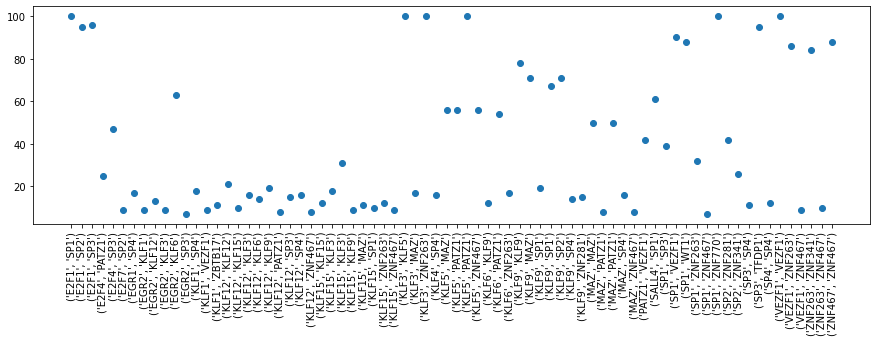

In [389]:
import matplotlib as mlp
import matplotlib.pyplot as plt

TFs_liver = []
distance_liver = []
for i in TF_list_of_oridis_liver:
    TFs_liver.append(i[0:2])
    distance_liver.append(i[2])
#TFs_liver
#distance_liver

ticks = list(range(0,74))
labels = TFs_liver

plt.figure(figsize=(15, 4))
plt.scatter(ticks,distance_liver)
plt.xticks(ticks, labels,  rotation='vertical')

plt.show()


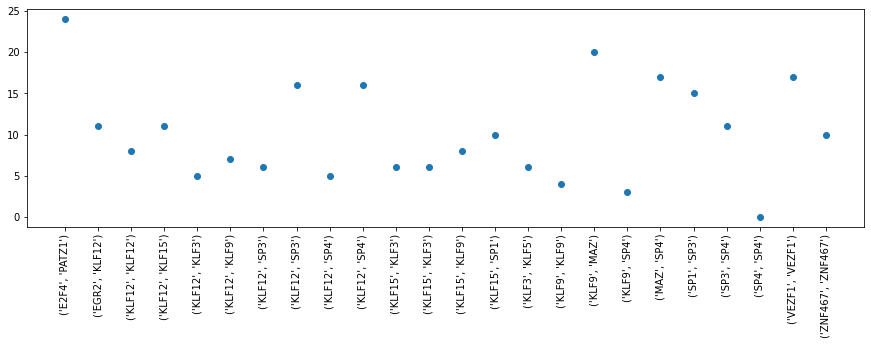

In [388]:
TFs_HepG2 = []
distance_HepG2 = []
for i in TF_list_of_oridis_HepG2_basedon_liver:
    TFs_HepG2.append(i[0:2])
    distance_HepG2.append(i[2])
TFs_HepG2
distance_HepG2

ticks = list(range(0,24))
labels = TFs_HepG2

plt.figure(figsize=(15, 4))
plt.scatter(ticks,distance_HepG2)
plt.xticks(ticks, labels,  rotation='vertical')

plt.show()

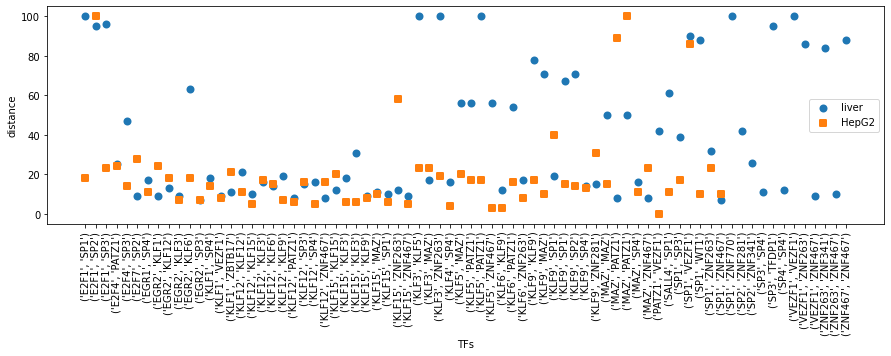

In [458]:
from matplotlib import pyplot as plt
import pandas as pd

TFs_liver = []
distance_liver = []
for i in TF_list_of_oridis_liver:
    TFs_liver.append(i[0:2])
    distance_liver.append(i[2])

ticks = list(range(0,74))
labels = TFs_liver

TFs_HepG2 = []
distance_HepG2 = []
for i in TF_list_of_oridis_HepG2_basedon_liver:
    TFs_HepG2.append(i[0:2])
    distance_HepG2.append(i[2])


ticks_hepG2 = list(range(0,62))
labels_HepG2 = TFs_HepG2

plt.figure(figsize=(15, 4))

plt.scatter(ticks, distance_liver,  lw=2, marker='o',label="liver")
plt.scatter(ticks_hepG2, distance_HepG2,  lw=2, marker='s', label="HepG2")

plt.xticks(ticks, labels,  rotation='vertical')
plt.xlabel('TFs')
plt.ylabel('distance')
plt.legend(loc="center right")

plt.show() 

#### mit Dataframe in csv Datei

In [ ]:
import pandas as pd

In [ ]:
TF_list_of_oridis_HepG2_basedon_liver_csv=pd.read_csv("/mnt/workspace_stud/stud7/Datenanalyse-2021/wp6/analyse/orientation_distance_listresults/orientationdistance_liver.csv")
# csv mit read_csv wieder einlesen

In [463]:
TF_list_of_oridis_HepG2_basedon_liver_csv

,Unnamed: 0,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count_x,Distance_percent,Noisiness,...,rank_Peak Heights,rank_Noisiness,mean_rank,TF1_TF2_count_y,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
0,0,EGR2,KLF3,9,3.920515,5.591779,2,793,0.074401,0.197540,...,5.0,20.0,10.333333,77,0.376623,0.376623,0.168831,0.077922,0.150849,1.039767e-04
1,1,EGR2,KLF12,13,3.346300,4.706758,2,662,0.074018,0.187538,...,17.0,14.0,12.666667,53,0.433962,0.433962,0.113208,0.018868,0.215885,1.641691e-06
2,3,KLF12,KLF12,21,3.380406,5.201246,2,404,0.084158,0.203387,...,16.0,23.0,13.666667,83,0.457831,0.457831,0.084337,0.000000,0.242440,1.204041e-12
3,5,KLF15,KLF15,12,4.567864,6.528151,2,641,0.085803,0.226396,...,1.0,50.0,17.333333,139,0.424460,0.424460,0.079137,0.071942,0.201471,1.323021e-14
4,6,KLF9,KLF9,78,3.149306,3.897402,2,313,0.067093,0.177692,...,31.0,8.0,19.666667,97,0.474227,0.474227,0.030928,0.020619,0.258949,8.033668e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,261,KLF9,SP2,71,2.882194,3.982087,2,1025,0.051707,0.336590,...,63.0,160.0,156.000000,149,0.416107,0.449664,0.107383,0.026846,0.214161,1.139032e-17
86,265,KLF6,PATZ1,54,2.915236,4.461465,2,1293,0.052591,0.418247,...,58.0,190.0,156.666667,158,0.411392,0.310127,0.183544,0.094937,0.139193,5.237497e-08
87,282,KLF5,SP1,46,2.730932,5.054853,2,969,0.050568,0.313213,...,83.0,141.0,164.666667,78,0.320513,0.397436,0.166667,0.115385,0.131371,1.054527e-03
88,296,KLF3,KLF5,100,3.045189,3.045189,2,820,0.029268,0.278851,...,43.0,109.0,168.333333,62,0.403226,0.403226,0.129032,0.064516,0.178880,2.741534e-05


In [467]:
df_orientation_distance_HepG2=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.7)]
df_orientation_distance_HepG2

,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count_x,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank,TF1_TF2_count_y,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
0,ZKSCAN1,ZKSCAN1,25,4.046677,5.116921,2,102,0.166667,0.088382,1.0,12.0,2.0,5.000000,75,0.480000,0.480000,0.013333,0.026667,0.265637,1.046493e-13
1,ZKSCAN1,ZKSCAN1,66,2.989215,3.767583,2,102,0.117647,0.088382,4.0,275.0,2.0,93.666667,75,0.480000,0.480000,0.013333,0.026667,0.265637,1.046493e-13
2,MYF6,TGIF1,48,4.802395,6.124940,2,80,0.137500,0.133347,3.0,2.0,14.0,6.333333,80,0.225000,0.375000,0.150000,0.250000,0.093541,3.842932e-02
3,MYF6,TGIF1,56,3.131331,3.897885,2,80,0.100000,0.133347,8.0,188.0,14.0,70.000000,80,0.225000,0.375000,0.150000,0.250000,0.093541,3.842932e-02
4,ZNF143,ZNF143,42,4.197712,5.336630,2,194,0.103093,0.129213,6.0,7.0,10.0,7.666667,60,0.366667,0.366667,0.033333,0.233333,0.157527,4.685956e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,PRDM6,ZNF467,100,3.037855,3.037855,2,2348,0.023424,0.269541,2258.0,244.0,868.0,1123.333333,177,0.338983,0.288136,0.209040,0.163842,0.078471,4.468641e-03
1943,NFATC1,NFATC1,67,2.742789,4.309498,2,779,0.042362,0.294002,1961.0,488.0,1003.0,1150.666667,56,0.357143,0.357143,0.160714,0.125000,0.124574,1.525335e-02
1964,INSM1,ZNF281,94,2.792592,3.117916,2,2202,0.042234,0.323214,1972.0,432.0,1089.0,1164.333333,57,0.210526,0.421053,0.192982,0.175439,0.114931,2.882800e-02
1993,BCL11A,SP2,0,2.824528,2.824528,2,2035,0.041769,0.337565,2005.0,400.0,1128.0,1177.666667,88,0.409091,0.284091,0.193182,0.113636,0.126880,7.067424e-04


In [475]:
df_distancedifference_2cells=TF_list_of_oridis_HepG2_basedon_liver_csv.merge(df_orientation_distance_HepG2, left_on =["TF1","TF2"], right_on = ["TF1","TF2"])
df_distancedifference_2cells

,Unnamed: 0,TF1,TF2,Distance_x,Peak Heights_x,Prominences_x,Threshold_x,TF1_TF2_count_x_x,Distance_percent_x,Noisiness_x,...,rank_Peak Heights_y,rank_Noisiness_y,mean_rank_y,TF1_TF2_count_y_y,TF1-TF2_y,TF2-TF1_y,convergent_y,divergent_y,std_y,pvalue_y
0,1,EGR2,KLF12,13,3.346300,4.706758,2,662,0.074018,0.187538,...,126.0,1093.0,468.333333,393,0.422392,0.361323,0.127226,0.089059,0.166420,3.989500e-28
1,3,KLF12,KLF12,21,3.380406,5.201246,2,404,0.084158,0.203387,...,86.0,760.0,287.666667,604,0.471854,0.471854,0.043046,0.013245,0.256464,5.268783e-103
2,6,KLF9,KLF9,78,3.149306,3.897402,2,313,0.067093,0.177692,...,85.0,116.0,73.666667,665,0.481203,0.481203,0.024060,0.013534,0.267005,5.542264e-123
3,8,SP4,SP4,12,3.985870,5.051422,2,561,0.071301,0.229778,...,3.0,183.0,406.333333,967,0.439504,0.439504,0.076525,0.044467,0.219211,1.555721e-120
4,12,KLF9,SP4,14,3.417800,5.371597,2,786,0.067430,0.247648,...,98.0,345.0,174.000000,679,0.444772,0.419735,0.098675,0.036819,0.212204,3.252283e-79
5,13,SP1,ZNF341,31,2.767938,4.394147,2,934,0.065310,0.176566,...,120.0,1232.0,608.000000,641,0.287051,0.363495,0.199688,0.149766,0.094573,7.722990e-15
6,27,KLF15,KLF3,18,3.246679,4.968328,2,1111,0.065707,0.253026,...,140.0,1178.0,545.000000,994,0.373239,0.382294,0.143863,0.100604,0.148631,7.844822e-57
7,28,KLF15,KLF3,31,2.839625,5.016595,2,1111,0.052205,0.253026,...,140.0,1178.0,545.000000,994,0.373239,0.382294,0.143863,0.100604,0.148631,7.844822e-57
8,32,KLF12,KLF9,19,3.007448,4.729084,2,686,0.065598,0.240518,...,6.0,1023.0,351.000000,637,0.453689,0.458399,0.062794,0.025118,0.238424,7.330993e-94
9,34,MAZ,SP4,16,2.813872,5.092284,2,1165,0.061803,0.215949,...,394.0,1363.0,818.000000,1183,0.366864,0.334742,0.167371,0.131023,0.118070,1.199582e-42


In [476]:
pd.set_option('max_columns', None)
df_distancedifference_2cells.head(5)

,Unnamed: 0,TF1,TF2,Distance_x,Peak Heights_x,Prominences_x,Threshold_x,TF1_TF2_count_x_x,Distance_percent_x,Noisiness_x,rank_Distance_percent_x,rank_Peak Heights_x,rank_Noisiness_x,mean_rank_x,TF1_TF2_count_y_x,TF1-TF2_x,TF2-TF1_x,convergent_x,divergent_x,std_x,pvalue_x,Distance_y,Peak Heights_y,Prominences_y,Threshold_y,TF1_TF2_count_x_y,Distance_percent_y,Noisiness_y,rank_Distance_percent_y,rank_Peak Heights_y,rank_Noisiness_y,mean_rank_y,TF1_TF2_count_y_y,TF1-TF2_y,TF2-TF1_y,convergent_y,divergent_y,std_y,pvalue_y
0,1,EGR2,KLF12,13,3.346300,4.706758,2,662,0.074018,0.187538,7.0,17.0,14.0,12.666667,53,0.433962,0.433962,0.113208,0.018868,0.215885,1.641691e-06,11,3.259082,4.986792,2,5306,0.056917,0.325971,186.0,126.0,1093.0,468.333333,393,0.422392,0.361323,0.127226,0.089059,0.166420,3.989500e-28
1,3,KLF12,KLF12,21,3.380406,5.201246,2,404,0.084158,0.203387,2.0,16.0,23.0,13.666667,83,0.457831,0.457831,0.084337,0.000000,0.242440,1.204041e-12,8,3.411083,5.120084,2,2740,0.079562,0.254196,17.0,86.0,760.0,287.666667,604,0.471854,0.471854,0.043046,0.013245,0.256464,5.268783e-103
2,6,KLF9,KLF9,78,3.149306,3.897402,2,313,0.067093,0.177692,20.0,31.0,8.0,19.666667,97,0.474227,0.474227,0.030928,0.020619,0.258949,8.033668e-17,4,3.411661,3.685649,2,2118,0.077432,0.174237,20.0,85.0,116.0,73.666667,665,0.481203,0.481203,0.024060,0.013534,0.267005,5.542264e-123
3,8,SP4,SP4,12,3.985870,5.051422,2,561,0.071301,0.229778,8.0,4.0,55.0,22.333333,180,0.450000,0.450000,0.066667,0.033333,0.231341,6.837656e-25,0,4.442503,4.442503,2,4618,0.050022,0.186294,1033.0,3.0,183.0,406.333333,967,0.439504,0.439504,0.076525,0.044467,0.219211,1.555721e-120
4,12,KLF9,SP4,14,3.417800,5.371597,2,786,0.067430,0.247648,18.0,13.0,75.0,35.333333,127,0.472441,0.401575,0.070866,0.055118,0.217962,1.305842e-15,3,3.343543,5.428009,2,5704,0.060835,0.209021,79.0,98.0,345.0,174.000000,679,0.444772,0.419735,0.098675,0.036819,0.212204,3.252283e-79


In [500]:
df_distancedifference_2cells['Difference between Distance'] = abs(df_distancedifference_2cells['Distance_x'] - df_distancedifference_2cells['Distance_y'])
df_distancedifference_2cells['TF-pair'] = df_distancedifference_2cells['TF1'] + " + " + df_distancedifference_2cells['TF2']
df_distancedifference_2cells

,Unnamed: 0,TF1,TF2,Distance_x,Peak Heights_x,Prominences_x,Threshold_x,TF1_TF2_count_x_x,Distance_percent_x,Noisiness_x,rank_Distance_percent_x,rank_Peak Heights_x,rank_Noisiness_x,mean_rank_x,TF1_TF2_count_y_x,TF1-TF2_x,TF2-TF1_x,convergent_x,divergent_x,std_x,pvalue_x,Distance_y,Peak Heights_y,Prominences_y,Threshold_y,TF1_TF2_count_x_y,Distance_percent_y,Noisiness_y,rank_Distance_percent_y,rank_Peak Heights_y,rank_Noisiness_y,mean_rank_y,TF1_TF2_count_y_y,TF1-TF2_y,TF2-TF1_y,convergent_y,divergent_y,std_y,pvalue_y,Difference between Distance,TF-pair
0,1,EGR2,KLF12,13,3.346300,4.706758,2,662,0.074018,0.187538,7.0,17.0,14.0,12.666667,53,0.433962,0.433962,0.113208,0.018868,0.215885,1.641691e-06,11,3.259082,4.986792,2,5306,0.056917,0.325971,186.0,126.0,1093.0,468.333333,393,0.422392,0.361323,0.127226,0.089059,0.166420,3.989500e-28,2,EGR2 + KLF12
1,3,KLF12,KLF12,21,3.380406,5.201246,2,404,0.084158,0.203387,2.0,16.0,23.0,13.666667,83,0.457831,0.457831,0.084337,0.000000,0.242440,1.204041e-12,8,3.411083,5.120084,2,2740,0.079562,0.254196,17.0,86.0,760.0,287.666667,604,0.471854,0.471854,0.043046,0.013245,0.256464,5.268783e-103,13,KLF12 + KLF12
2,6,KLF9,KLF9,78,3.149306,3.897402,2,313,0.067093,0.177692,20.0,31.0,8.0,19.666667,97,0.474227,0.474227,0.030928,0.020619,0.258949,8.033668e-17,4,3.411661,3.685649,2,2118,0.077432,0.174237,20.0,85.0,116.0,73.666667,665,0.481203,0.481203,0.024060,0.013534,0.267005,5.542264e-123,74,KLF9 + KLF9
3,8,SP4,SP4,12,3.985870,5.051422,2,561,0.071301,0.229778,8.0,4.0,55.0,22.333333,180,0.450000,0.450000,0.066667,0.033333,0.231341,6.837656e-25,0,4.442503,4.442503,2,4618,0.050022,0.186294,1033.0,3.0,183.0,406.333333,967,0.439504,0.439504,0.076525,0.044467,0.219211,1.555721e-120,12,SP4 + SP4
4,12,KLF9,SP4,14,3.417800,5.371597,2,786,0.067430,0.247648,18.0,13.0,75.0,35.333333,127,0.472441,0.401575,0.070866,0.055118,0.217962,1.305842e-15,3,3.343543,5.428009,2,5704,0.060835,0.209021,79.0,98.0,345.0,174.000000,679,0.444772,0.419735,0.098675,0.036819,0.212204,3.252283e-79,11,KLF9 + SP4
5,13,SP1,ZNF341,31,2.767938,4.394147,2,934,0.065310,0.176566,30.0,76.0,6.0,37.333333,100,0.300000,0.340000,0.220000,0.140000,0.088694,2.397830e-02,18,3.270101,4.823153,2,8698,0.053461,0.40042,472.0,120.0,1232.0,608.000000,641,0.287051,0.363495,0.199688,0.149766,0.094573,7.722990e-15,13,SP1 + ZNF341
6,27,KLF15,KLF3,18,3.246679,4.968328,2,1111,0.065707,0.253026,27.0,22.0,83.0,44.000000,123,0.406504,0.382114,0.146341,0.065041,0.170199,2.772640e-09,6,3.224322,4.690112,2,9736,0.054951,0.36286,317.0,140.0,1178.0,545.000000,994,0.373239,0.382294,0.143863,0.100604,0.148631,7.844822e-57,12,KLF15 + KLF3
7,28,KLF15,KLF3,31,2.839625,5.016595,2,1111,0.052205,0.253026,230.0,67.0,83.0,126.666667,123,0.406504,0.382114,0.146341,0.065041,0.170199,2.772640e-09,6,3.224322,4.690112,2,9736,0.054951,0.36286,317.0,140.0,1178.0,545.000000,994,0.373239,0.382294,0.143863,0.100604,0.148631,7.844822e-57,25,KLF15 + KLF3
8,32,KLF12,KLF9,19,3.007448,4.729084,2,686,0.065598,0.240518,28.0,48.0,65.0,47.000000,87,0.459770,0.436782,0.080460,0.022989,0.230340,5.666788e-12,7,4.271845,5.687282,2,4745,0.074394,0.299779,24.0,6.0,1023.0,351.000000,637,0.453689,0.458399,0.062794,0.025118,0.238424,7.330993e-94,12,KLF12 + KLF9
9,34,MAZ,SP4,16,2.813872,5.092284,2,1165,0.061803,0.215949,47.0,71.0,36.0,51.333333,162,0.438272,0.265432,0.179012,0.117284,0.139448,3.112162e-08,17,2.828846,4.378119,2,11086,0.051867,0.542936,697.0,394.0,1363.0,818.000000,1183,0.366864,0.334742,0.167371,0.131023,0.118070,1.199582e-42,1,MAZ + SP4


In [527]:
df_distancedifference_2cells_sorted=df_distancedifference_2cells.sort_values(by=['Difference between Distance'])
df_distancedifference_2cells_sorted

,Unnamed: 0,TF1,TF2,Distance_x,Peak Heights_x,Prominences_x,Threshold_x,TF1_TF2_count_x_x,Distance_percent_x,Noisiness_x,rank_Distance_percent_x,rank_Peak Heights_x,rank_Noisiness_x,mean_rank_x,TF1_TF2_count_y_x,TF1-TF2_x,TF2-TF1_x,convergent_x,divergent_x,std_x,pvalue_x,Distance_y,Peak Heights_y,Prominences_y,Threshold_y,TF1_TF2_count_x_y,Distance_percent_y,Noisiness_y,rank_Distance_percent_y,rank_Peak Heights_y,rank_Noisiness_y,mean_rank_y,TF1_TF2_count_y_y,TF1-TF2_y,TF2-TF1_y,convergent_y,divergent_y,std_y,pvalue_y,Difference between Distance,TF-pair
21,64,SP3,SP4,11,2.826423,4.833003,2,1331,0.060856,0.240578,60.0,68.0,66.0,64.666667,220,0.463636,0.359091,0.095455,0.081818,0.191233,8.593248e-21,11,3.291490,5.098613,2,10540,0.055408,0.180712,289.0,110.0,152.0,183.666667,1256,0.393312,0.367038,0.141720,0.097930,0.151752,6.367228e-75,0,SP3 + SP4
20,60,KLF15,SP1,10,4.234060,5.999559,2,1357,0.067797,0.338553,15.0,3.0,164.0,60.666667,201,0.368159,0.368159,0.159204,0.104478,0.138256,5.388680e-10,10,2.980619,4.179903,2,11296,0.051611,0.462306,739.0,278.0,1279.0,765.333333,1208,0.343543,0.388245,0.152318,0.115894,0.135878,1.002210e-57,0,KLF15 + SP1
13,44,KLF12,SP4,16,3.230906,5.198991,2,893,0.064950,0.274581,33.0,24.0,107.0,54.666667,113,0.460177,0.415929,0.097345,0.026549,0.219804,3.895485e-14,16,2.838464,4.217554,2,6530,0.057887,0.292474,144.0,386.0,997.0,509.000000,672,0.427083,0.416667,0.099702,0.056548,0.199290,4.068894e-69,0,KLF12 + SP4
14,49,E2F4,PATZ1,25,3.445142,5.259370,2,720,0.068056,0.312898,14.0,12.0,140.0,55.333333,65,0.307692,0.430769,0.107692,0.153846,0.147764,6.965187e-04,24,2.996359,5.087778,2,4231,0.053652,0.492736,448.0,270.0,1315.0,677.666667,295,0.311864,0.372881,0.179661,0.135593,0.111001,1.820131e-09,1,E2F4 + PATZ1
24,110,KLF12,KLF15,10,3.000833,4.535382,2,907,0.069460,0.426260,12.0,50.0,191.0,84.333333,74,0.418919,0.445946,0.067568,0.067568,0.210944,1.351026e-08,11,2.878005,4.254892,2,6960,0.056034,0.468112,249.0,358.0,1284.0,630.333333,498,0.411647,0.383534,0.114458,0.090361,0.171092,1.096211e-37,1,KLF12 + KLF15
18,54,KLF12,KLF3,16,2.825365,4.470443,2,885,0.066667,0.254281,22.0,69.0,85.0,58.666667,91,0.461538,0.384615,0.120879,0.032967,0.205463,5.403412e-10,17,2.779330,4.337474,2,6417,0.056724,0.342692,193.0,443.0,1147.0,594.333333,688,0.444767,0.412791,0.094477,0.047965,0.207718,6.708442e-77,1,KLF12 + KLF3
16,53,KLF12,SP3,15,2.983267,4.982655,2,1086,0.070902,0.281357,9.0,51.0,112.0,57.333333,117,0.418803,0.418803,0.111111,0.051282,0.196442,1.027392e-11,16,2.920053,4.471751,2,7598,0.057384,0.430063,160.0,319.0,1255.0,578.000000,748,0.430481,0.387701,0.114973,0.066845,0.185574,1.060507e-66,1,KLF12 + SP3
10,38,KLF15,KLF9,9,2.806233,4.844282,2,781,0.061460,0.215192,49.0,73.0,34.0,52.000000,64,0.390625,0.437500,0.062500,0.109375,0.191366,3.419098e-06,8,3.349268,4.447043,2,5992,0.061081,0.506382,77.0,96.0,1329.0,500.666667,516,0.385659,0.412791,0.127907,0.073643,0.174081,1.970852e-40,1,KLF15 + KLF9
9,34,MAZ,SP4,16,2.813872,5.092284,2,1165,0.061803,0.215949,47.0,71.0,36.0,51.333333,162,0.438272,0.265432,0.179012,0.117284,0.139448,3.112162e-08,17,2.828846,4.378119,2,11086,0.051867,0.542936,697.0,394.0,1363.0,818.000000,1183,0.366864,0.334742,0.167371,0.131023,0.118070,1.199582e-42,1,MAZ + SP4
0,1,EGR2,KLF12,13,3.346300,4.706758,2,662,0.074018,0.187538,7.0,17.0,14.0,12.666667,53,0.433962,0.433962,0.113208,0.018868,0.215885,1.641691e-06,11,3.259082,4.986792,2,5306,0.056917,0.325971,186.0,126.0,1093.0,468.333333,393,0.422392,0.361323,0.127226,0.089059,0.166420,3.989500e-28,2,EGR2 + KLF12


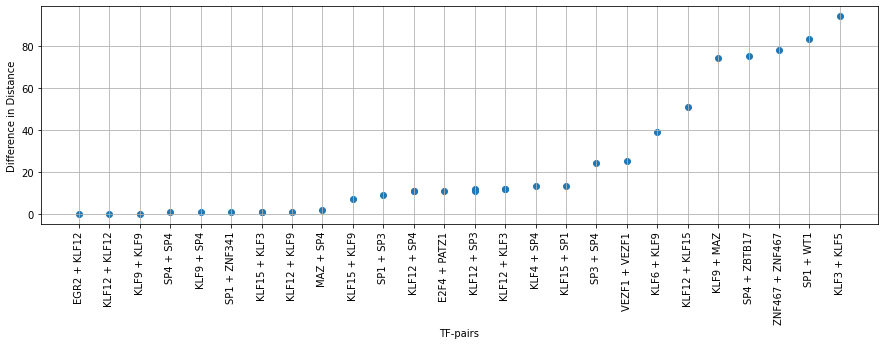

In [538]:
#df_distancedifference_2cells_sorted=df_distancedifference_2cells.sort_values(by=['Difference between Distance'])

differencedistance = df_distancedifference_2cells_sorted['Difference between Distance']
TFpairs = df_distancedifference_2cells['TF-pair']

plt.figure(figsize=(15, 4))
plt.scatter(TFpairs,differencedistance)
plt.xticks(rotation='vertical')
plt.grid(True)
plt.xlabel('TF-pairs')
plt.ylabel('Difference in Distance')


plt.show()

### orientation <-> distance

Text(0, 0.5, 'orientation')

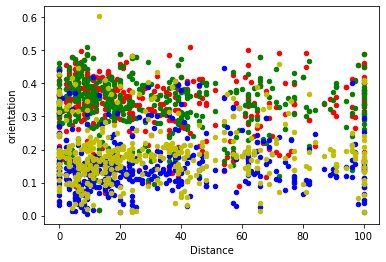

In [462]:
ax1 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='TF1-TF2', color='r')    
ax2 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='TF2-TF1', color='g', ax=ax1)    
ax3 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='divergent', color='b', ax=ax1)
ax4 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='convergent', color='y', ax=ax1)
ax1.set_ylabel("orientation")

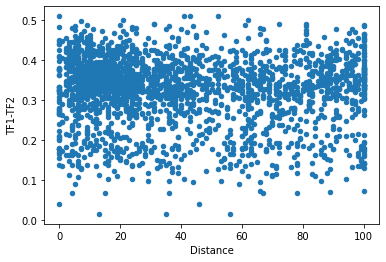

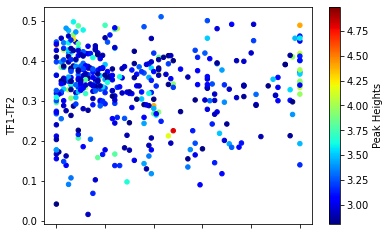

In [196]:
plot_distance_T1_TF2=df_orientation_distance.plot(x ='Distance', y='TF1-TF2', kind = 'scatter')
plot_distance_T1_TF2=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='TF1-TF2', kind = 'scatter', c='Peak Heights', colormap='jet')


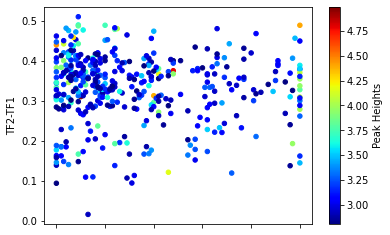

In [166]:
plot_distance_T2_TF1=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='TF2-TF1', kind = 'scatter',c='Peak Heights', colormap='jet')

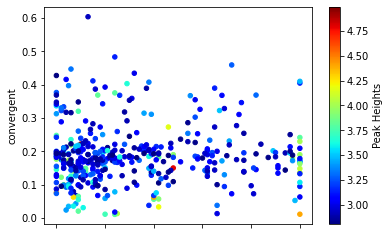

In [167]:
plot_distance_convergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='convergent', kind = 'scatter',c='Peak Heights', colormap='jet')

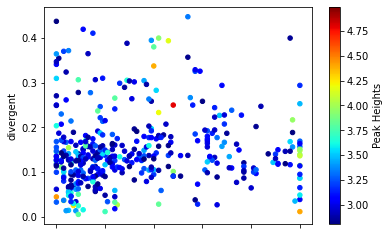

In [168]:
plot_distance_divergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='divergent', kind = 'scatter',c='Peak Heights', colormap='jet')

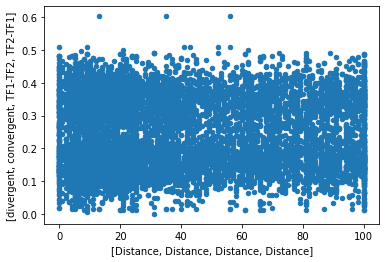

In [149]:
plot_distance=df_orientation_distance.plot(x = ['Distance','Distance','Distance','Distance'], y=['divergent','convergent','TF1-TF2','TF2-TF1'],kind='scatter')


Text(0, 0.5, 'orientation')

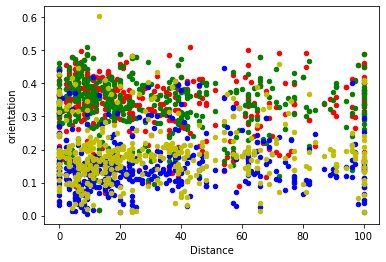

In [169]:
ax1 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='TF1-TF2', color='r')    
ax2 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='TF2-TF1', color='g', ax=ax1)    
ax3 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='divergent', color='b', ax=ax1)
ax4 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='convergent', color='y', ax=ax1)
ax1.set_ylabel("orientation")

#print(ax1 == ax2 == ax3 == ax4)

In [111]:
orientation_selected

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
SP1-SP1,SP1,SP1,1490,0.442282,0.442282,0.065101,0.050336,0.222110,6.857407e-191
MAZ-MAZ,MAZ,MAZ,2004,0.414172,0.414172,0.097305,0.074351,0.189801,1.795362e-187
SP2-SP2,SP2,SP2,1728,0.414931,0.414931,0.096065,0.074074,0.190657,4.627985e-163
SP3-SP3,SP3,SP3,1463,0.425837,0.425837,0.086808,0.061517,0.203302,5.847423e-157
ZNF467-ZNF467,ZNF467,ZNF467,1541,0.415315,0.415315,0.093446,0.075925,0.191023,6.207794e-146
...,...,...,...,...,...,...,...,...,...
OSR2-SP3,OSR2,SP3,93,0.172043,0.279570,0.193548,0.354839,0.083924,4.899073e-02
INSM1-ZNF263,INSM1,ZNF263,52,0.230769,0.403846,0.230769,0.134615,0.112134,4.930058e-02
MAZ-TFAP2B,MAZ,TFAP2B,152,0.315789,0.296053,0.203947,0.184211,0.065570,4.939015e-02
SP3-TCF4,SP3,TCF4,129,0.279070,0.333333,0.170543,0.217054,0.071153,4.949868e-02
